<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PROYECTO/Project_Raiza/Project_HeartDisease_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La Base de datos escogida muestra los resultados de los exámenes de sangre de diferentes pacientes.  El objetivo es con base a éstos resultados, detectar si determinado paciente podría llegar a padecer una cardiopatía.

Los rangos van desde 0 (sin riesgo) a 4.

In [1]:
import pandas as pd
cora = pd.read_csv('/content/drive/My Drive/heart.csv')
cora.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
cora.shape

(303, 14)

In [3]:
cora.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

En donde: sex: (1 = male, 0 = female)

cp: si experimenta dolor de pecho (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: presión arterial en reposo (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: ritmo cardíaco máximo

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: ascending, Value 2: flat, Value 3: descending)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [4]:
cora.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Tengo 13 variables númericas íntegras y 1 float. Paso a cambiarla a íntegra y cambio los valores de la columna Sexo a Male y Female para mejor categorización.

In [8]:
cora['oldpeak'] = cora['oldpeak'].astype (int)
cora.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [9]:
cora['sex'].unique ()

array([1, 0])

In [10]:
cora['sex'] = cora.sex.replace([0,1],['Female','Male'])
cora.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0,2,0,2,1


In [11]:
cora.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

En promedio, la base de datos contiene observaciones 303 en pacientes, con una media de edad de 54 años, siendo 29 años la edad del paciente más joven y 77 el más viejo.

Claramente se ve que los rangos de riesgo en los distintos resultados van incrementando a mayor edad.

In [12]:
cora.describe ()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


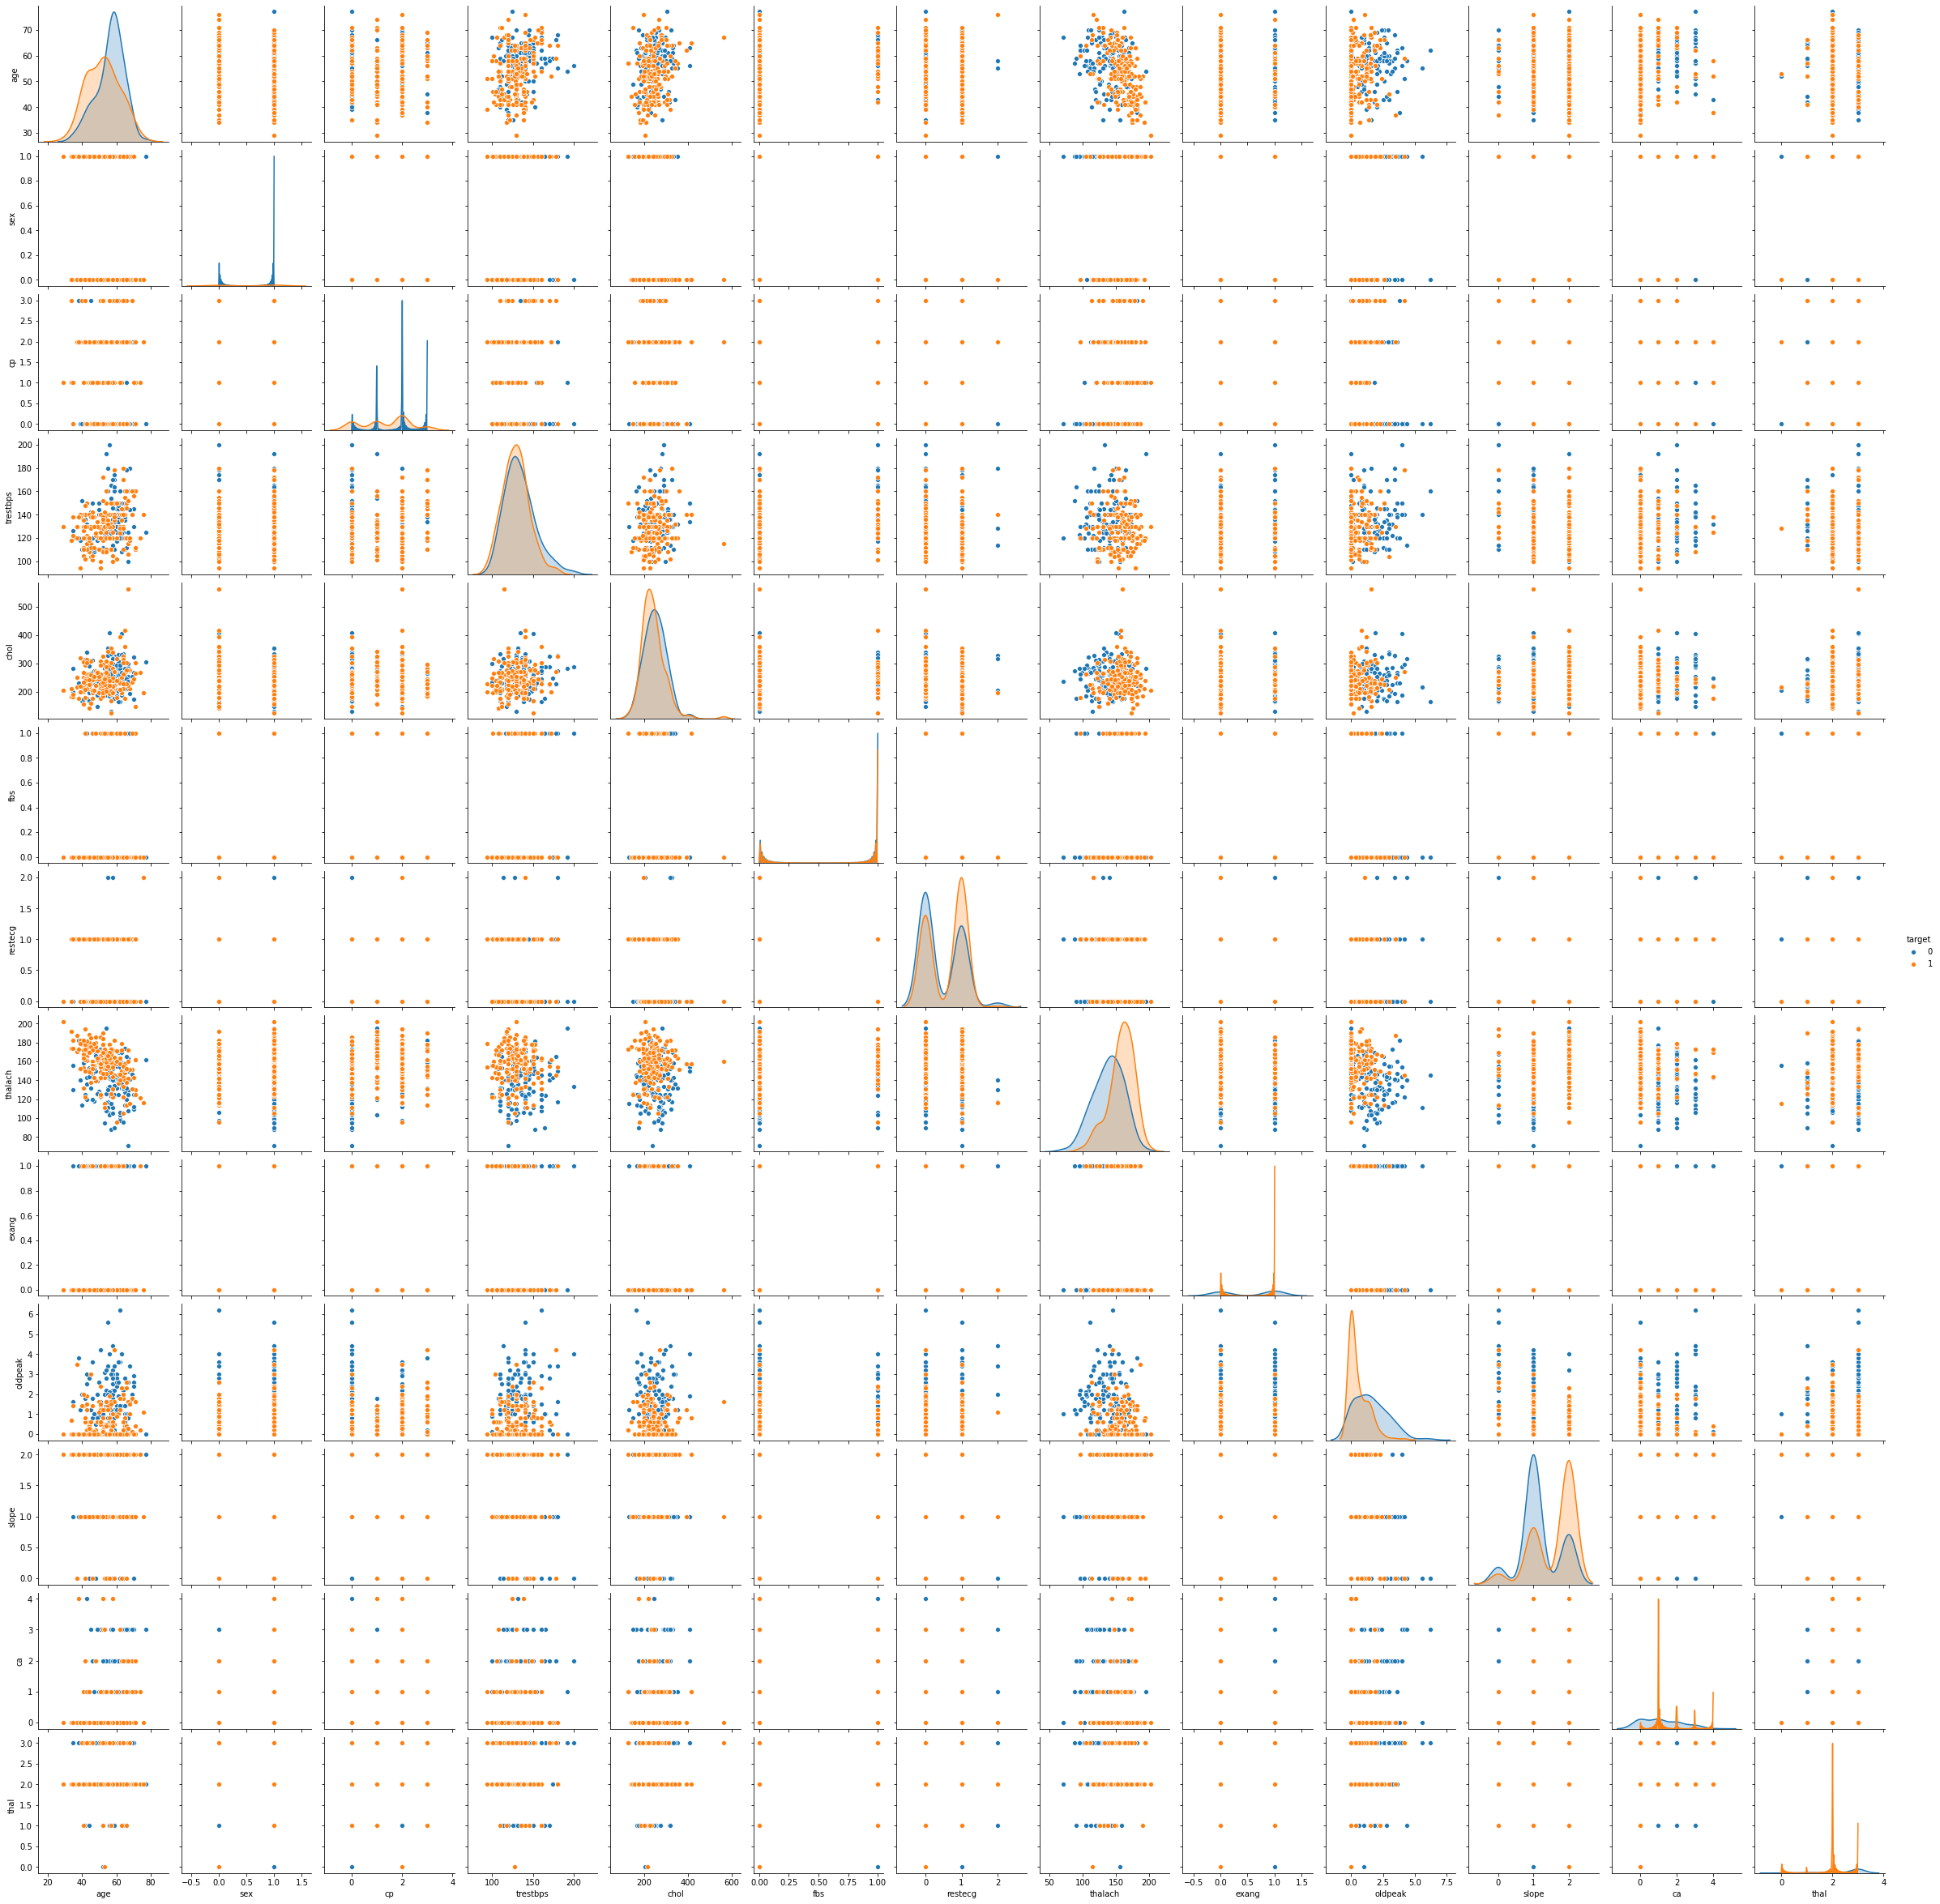

In [6]:
import seaborn as sns
sns.pairplot (cora, hue = 'target')

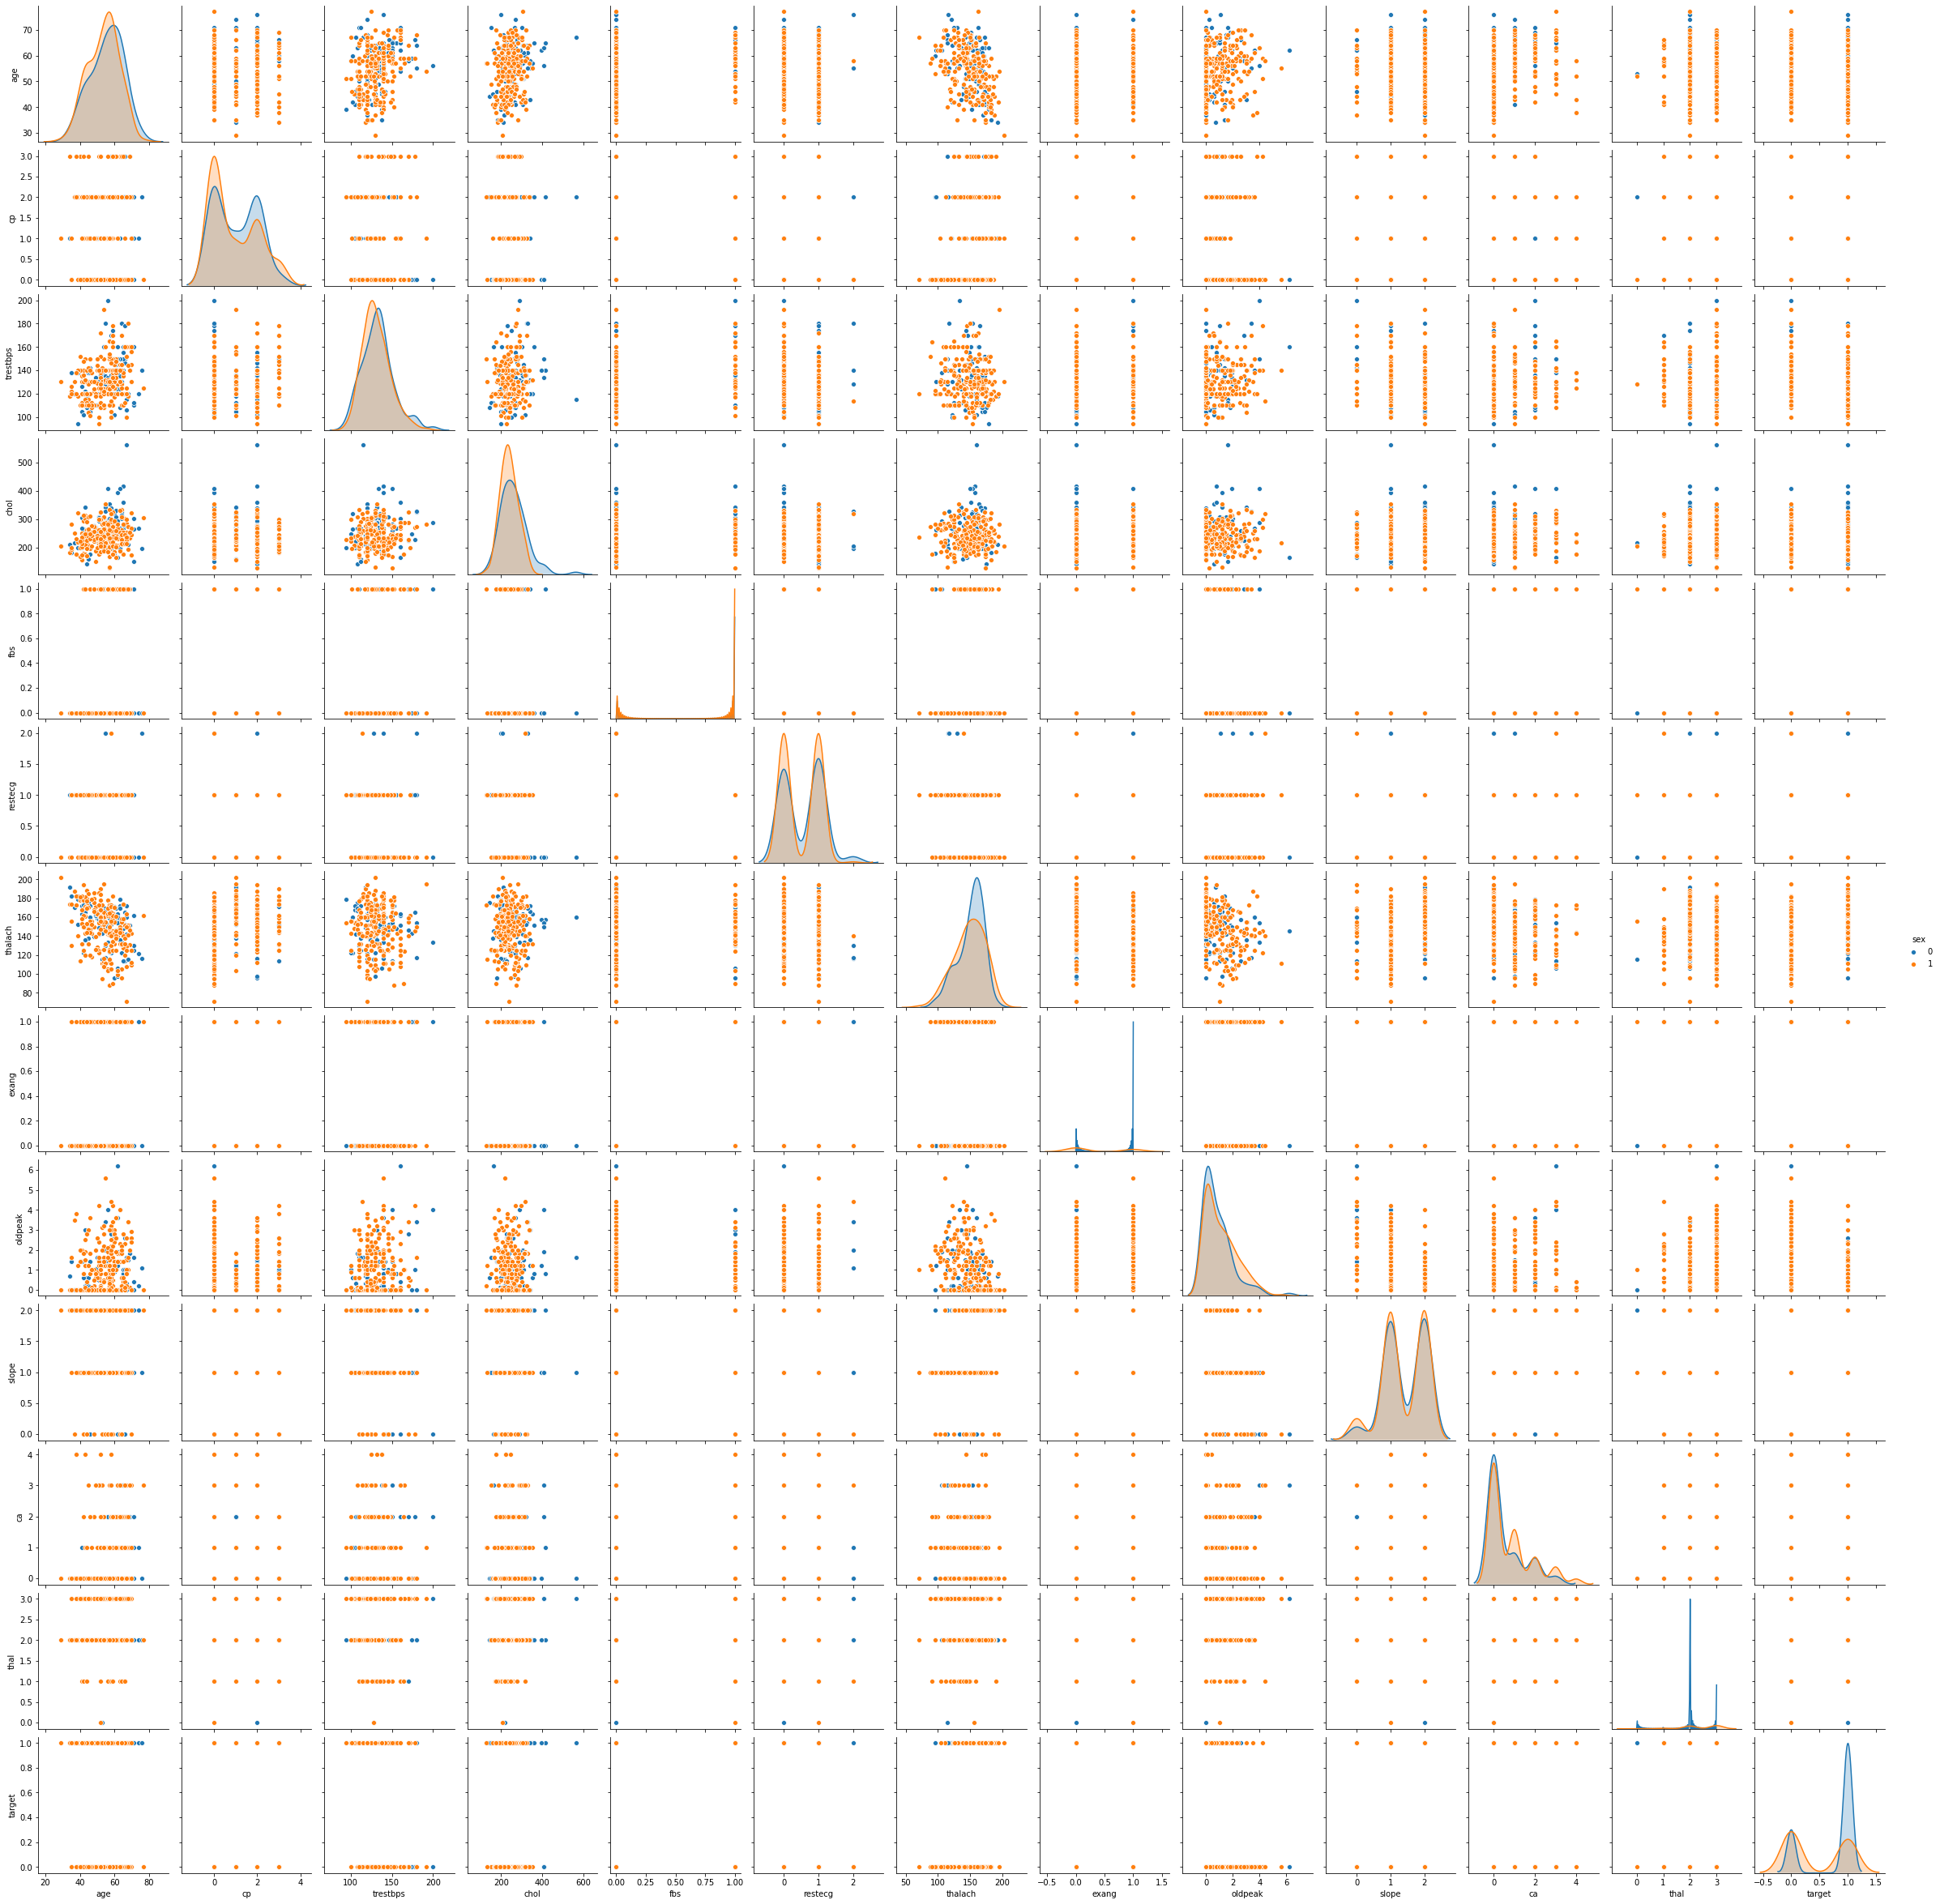

In [7]:
import seaborn as sns
sns.pairplot (cora, hue = 'sex')